## 1.  Business Understanding - Med Lab Project 



### 1. Business Context

The Med Lab Project centers on a **private medical diagnostic laboratory in Ghana** that provides a variety of clinical tests to clients. The lab's primary goal is to boost **operational efficiency, profitability, and customer experience** using data-driven insights.

The available dataset is crucial for optimizing service delivery as it includes **test transactions, patient types, result turnaround times, and referral sources**.

The **healthcare diagnostic sector in Ghana is highly competitive**. Patient satisfaction is closely linked to **quick results, affordable pricing, and accessible referral channels**. Consequently, understanding **operational trends, patient behavior, and revenue patterns** is vital for informed decision-making.



### 2. Business Problem Definition

The laboratory management currently lacks a data-driven system to:
* Monitor and predict **demand fluctuations** (e.g., during peak/off-peak hours).
* Identify **revenue trends** across test categories.
* Evaluate service **efficiency** based on result turnaround times.
* Analyze **patient retention** (new vs. returning clients).
* Measure the impact of **referral sources** on patient inflow and revenue.

Without these insights, resource allocation (staffing, reagent procurement, test pricing) remains **reactive** instead of **proactive**.


### 3. Business Objectives

The project aims to:
1.  **Understand business performance patterns** — Identify which test categories generate the most revenue and which periods experience the highest demand.
2.  **Improve operational efficiency** — Analyze result turnaround times to detect bottlenecks and opportunities for faster service.
3.  **Enhance customer retention** — Study patterns in new versus returning patients and their relationship with satisfaction factors like result time and pricing.
4.  **Support marketing and partnership decisions** — Evaluate which referral channels (walk-ins, online bookings, partner clinics) contribute most to patient traffic and revenue.



### 4. Business Questions

| Question | Focus Area |
| :--- | :--- |
| **Which test types and categories generate the highest revenue?** | Revenue & Performance |
| **How does result turnaround time vary across test categories and peak/off-peak hours?** | Operational Efficiency |
| **What is the proportion of new versus returning patients, and how do their spending behaviors differ?** | Customer Retention & Behavior |
| **Which referral sources contribute most to total patient visits and revenue?** | Marketing & Partnerships |
| **How do patient visits and revenues fluctuate over time (daily, weekly, or monthly)?** | Demand & Trend Forecasting |



### 5. Key Stakeholders

| Stakeholder | Interest |
| :--- | :--- |
| **Lab Management** | Improve efficiency and revenue through insights |
| **Operations Team** | Optimize staff scheduling and test processing |
| **Marketing Team** | Assess the effectiveness of referral and booking channels |
| **Patients** | Benefit from quicker service and transparent pricing |
| **Partner Clinics / Doctors** | Improve referral efficiency and turnaround reliability |


### 6. Key Features (Data Dictionary)

| Feature | Description |
| :--- | :--- |
| **Test Type** | The specific medical laboratory test performed (e.g., Full Blood Count, Malaria Test, Cholesterol Test). |
| **Test Category** | Broader grouping of the test (e.g., General Health, Infectious Disease, Lifestyle & Diet). |
| **Price (GHS)** | Price of the test in **Ghanaian cedis**. |
| **Result Time (Hrs)** | Time taken to produce the test result (in **hours**). |
| **New/Returning Patient** | Indicates if the patient is **new** or **returning**. |
| **Peak/Off-Peak** | Indicates whether the test was conducted during **peak or off-peak hours**. |
| **Referral Source** | How the patient came to the lab (e.g., Walk-in, Partner Clinic, Online Booking, Referral). |

## 2. DATA UNDERSTANDING & PREPARATION

In [64]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
#load the dataset 
lab_data = pd.read_csv('../Data/Data.csv')

lab_data.head(20)

,Date,Patient ID,Test Type,Test Category,Price (GHS),Result Time (Hrs),New/Returning Patient,Peak/Off-Peak,Referral Source
0,10/1/2024,1001,Full Blood Count,General Health,150,4.0,New,Peak,Walk-in
1,10/2/2024,1002,Malaria Test,Infectious Disease,80,2.0,Returning,Off-Peak,Partner Clinic
2,10/3/2024,1003,Cholesterol Test,Lifestyle & Diet,200,6.0,New,Peak,Online Booking
3,10/4/2024,1004,COVID-19 Test,Infectious Disease,250,1.0,Returning,Off-Peak,Walk-in
4,10/5/2024,1005,Liver Function,General Health,180,5.0,New,Peak,Referral
5,10/6/2024,1006,Pregnancy Test,Women's Health,60,1.0,Returning,Off-Peak,Walk-in
6,1/5/2024,PT1001,Full Blood Count,Hematology,120,4.5,New,Peak,Hospital A
7,1/7/2024,PT1002,Lipid Profile,Biochemistry,200,6.0,Returning,Off-Peak,Private Clinic B
8,1/10/2024,PT1003,Urinalysis,Microbiology,80,3.0,New,Peak,NaN
9,1/12/2024,PT1004,Liver Function,Biochemistry,180,5.5,Returning,Peak,Hospital C


In [66]:
print("Number of rows and columns in the dataset:", lab_data.shape)

lab_data.info(verbose=True, memory_usage='deep')

Number of rows and columns in the dataset: (155, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   155 non-null    object 
 1   Patient ID             155 non-null    object 
 2   Test Type              155 non-null    object 
 3   Test Category          155 non-null    object 
 4   Price (GHS)            155 non-null    int64  
 5   Result Time (Hrs)      147 non-null    float64
 6   New/Returning Patient  155 non-null    object 
 7   Peak/Off-Peak          155 non-null    object 
 8   Referral Source        106 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 62.5 KB


In [67]:
#Initial statistical summary of the dataset
lab_data.describe().round(2)

,Price (GHS),Result Time (Hrs)
count,155.00,147.00
mean,146.97,4.44
std,65.31,1.79
min,40.00,1.00
25%,90.00,3.00
50%,140.00,4.50
75%,190.00,5.75
max,300.00,8.00


In [68]:
# check for duplicated rows and columns
duplicated_rows = lab_data.duplicated()
print("Number of duplicated rows:", duplicated_rows.sum())
duplicated_columns = lab_data.columns.duplicated().T
print("Number of duplicated columns:", duplicated_columns.sum())


Number of duplicated rows: 0
Number of duplicated columns: 0


In [69]:
#Check for unique values in each columns
for column in lab_data.columns:
    unique_values = lab_data[column].nunique()
    print(f"Column '{column}' has {unique_values} unique values.")

Column 'Date' has 117 unique values.
Column 'Patient ID' has 115 unique values.
Column 'Test Type' has 41 unique values.
Column 'Test Category' has 16 unique values.
Column 'Price (GHS)' has 28 unique values.
Column 'Result Time (Hrs)' has 15 unique values.
Column 'New/Returning Patient' has 2 unique values.
Column 'Peak/Off-Peak' has 2 unique values.
Column 'Referral Source' has 8 unique values.


In [70]:
#Check for missing values
missing_values = lab_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Date                      0
Patient ID                0
Test Type                 0
Test Category             0
Price (GHS)               0
Result Time (Hrs)         8
New/Returning Patient     0
Peak/Off-Peak             0
Referral Source          49
dtype: int64


#### Initial Inspection of the Dataset

##### 2.1 Data Overview 
* Dataset name: `Data.csv` 
* Rows: 155
* Columns: 9 features


| Attribute | Description | Type | Unique Values | Missing |
| :--- | :--- | :--- | :--- | :--- |
| Date | Test date | DateTime | 117 | 0 |
| Patient ID | Unique patient identifier | Object | 115 | 0 |
| Test Type | Specific test name (e.g., Malaria Test, Liver Function) | Object | 41 | 0 |
| Test Category | Broader category (e.g., Biochemistry, Infectious Disease) | Object | 16 | 0 |
| Price (GHS) | Cost of test | Numeric | 28 | 0 |
| Result Time (Hrs) | Hours to produce results | Numeric | 15 | 8 missing |
| New/Returning Patient | Patient status | Categorical | 2 (New, Returning) | 0 |
| Peak/Off-Peak | Time of visit | Categorical | 2 (Peak, Off-Peak) | 0 |
| Referral Source | How patient came (Walk-in, Partner Clinic, etc.) | Categorical | 8 | 49 missing |

##### 2.2 Key Descriptive Statistics
| Variable | Mean | Std. Dev | Min | Median | Max |
| :--- | :--- | :--- | :--- | :--- | :--- |
| **Price (GHS)** | 146.97 | 65.31 | 40 | 140 | 300 |
| **Result Time (Hrs)** | 4.44 | 1.79 | 1 | 4.5 | 8 |

#### Insights from Key Descriptive Statistics
* Most tests cost between GHS 90–190.
* Result turnaround typically falls between 3–6 hours, but some take up to 8 hours.
* 8 records lack result-time data likely due to missing logging or manual entry errors.
* 49 missing entries in referral source suggest unrecorded or walk-in clients.


##### 2.3 Data Quality & Consistency Checks
| Check | Findings | Action |
| :--- | :--- | :--- |
| **Missing Values** | Result Time (8), Referral Source (49) | Impute or categorize as **“Unknown”** |
| **Duplicates** | None detected | **No action needed** |
| **Data Type Accuracy** | All correct (Date as datetime, prices numeric, etc.) | **✅** |
| **Outliers** | Price: 300 GHS may be a premium test; valid. Result time: 8 hrs plausible. | **No removal needed** |
| **Temporal Range** | Jan–Oct 2024, continuous monthly data | **✅ Good for trend analysis** |


From the initial inspection, we can see that the patient Id and date column has inconsistent formatting. We will need to standardize these columns for easier analysis.



### 3. DATA PREPARATION

In [71]:
#Sorting the date column
lab_data['Date'] = pd.to_datetime(lab_data['Date'], errors='coerce')
lab_data = lab_data.sort_values(by='Date')

lab_data.head()

,Date,Patient ID,Test Type,Test Category,Price (GHS),Result Time (Hrs),New/Returning Patient,Peak/Off-Peak,Referral Source
46,2024-01-03,PT1001,Full Blood Count,Hematology,120,4.5,New,Peak,Hospital A
47,2024-01-04,PT1002,Lipid Profile,Biochemistry,200,6.0,Returning,Off-Peak,Private Clinic B
48,2024-01-05,PT1003,Urinalysis,Microbiology,80,3.0,New,Peak,NaN
6,2024-01-05,PT1001,Full Blood Count,Hematology,120,4.5,New,Peak,Hospital A
49,2024-01-06,PT1004,Liver Function,Biochemistry,180,5.5,Returning,Peak,Hospital C


In [72]:
#Correcting Patient Id column
lab_data['Patient ID'] = lab_data['Patient ID'].apply(
    lambda x: f"PT{x}" if str(x).isdigit() else x
)


In [73]:
# Correcting New/Returning Patient Column
lab_data['Patient ID'] = lab_data['Patient ID'].astype(str)
lab_data = lab_data.sort_values(['Patient ID', 'Date'])
first_visit_mask = lab_data.groupby('Patient ID').cumcount() == 0
lab_data.loc[first_visit_mask, 'New/Returning Patient'] = 'New'
lab_data.loc[~first_visit_mask, 'New/Returning Patient'] = 'Returning'
lab_data = lab_data.reset_index(drop=True)

lab_data.head(20)


,Date,Patient ID,Test Type,Test Category,Price (GHS),Result Time (Hrs),New/Returning Patient,Peak/Off-Peak,Referral Source
0,2024-01-03,PT1001,Full Blood Count,Hematology,120,4.5,New,Peak,Hospital A
1,2024-01-05,PT1001,Full Blood Count,Hematology,120,4.5,Returning,Peak,Hospital A
2,2024-10-01,PT1001,Full Blood Count,General Health,150,4.0,Returning,Peak,Walk-in
3,2024-01-04,PT1002,Lipid Profile,Biochemistry,200,6.0,New,Off-Peak,Private Clinic B
4,2024-01-07,PT1002,Lipid Profile,Biochemistry,200,6.0,Returning,Off-Peak,Private Clinic B
5,2024-10-02,PT1002,Malaria Test,Infectious Disease,80,2.0,Returning,Off-Peak,Partner Clinic
6,2024-01-05,PT1003,Urinalysis,Microbiology,80,3.0,New,Peak,NaN
7,2024-01-10,PT1003,Urinalysis,Microbiology,80,3.0,Returning,Peak,NaN
8,2024-10-03,PT1003,Cholesterol Test,Lifestyle & Diet,200,6.0,Returning,Peak,Online Booking
9,2024-01-06,PT1004,Liver Function,Biochemistry,180,5.5,New,Peak,Hospital C


In [74]:
# Change the data type of columns with Object type to 'str'
lab_data['Test Type'] = lab_data['Test Type'].astype(str)
lab_data['Test Category'] = lab_data['Test Category'].astype(str)



In [75]:
# Handling missing values
#For numeric columns, we can fill missing values with the median or mean of the column.
lab_data.isnull().sum()

lab_data['Result Time (Hrs)'] = lab_data['Result Time (Hrs)'].fillna(lab_data['Result Time (Hrs)'].median())

#For categorical columns, we can fill missing values with the mode (most frequent value) of the column but in this case we will fill with 'Unknown'
lab_data['Referral Source'].fillna('Unknown', inplace=True)

C:\Users\OMEN\AppData\Local\Temp\ipykernel_9308\1714124548.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  lab_data['Referral Source'].fillna('Unknown', inplace=True)


In [76]:
lab_data.isnull().sum()


Date                     0
Patient ID               0
Test Type                0
Test Category            0
Price (GHS)              0
Result Time (Hrs)        0
New/Returning Patient    0
Peak/Off-Peak            0
Referral Source          0
dtype: int64

In [77]:
lab_data.head()

,Date,Patient ID,Test Type,Test Category,Price (GHS),Result Time (Hrs),New/Returning Patient,Peak/Off-Peak,Referral Source
0,2024-01-03,PT1001,Full Blood Count,Hematology,120,4.5,New,Peak,Hospital A
1,2024-01-05,PT1001,Full Blood Count,Hematology,120,4.5,Returning,Peak,Hospital A
2,2024-10-01,PT1001,Full Blood Count,General Health,150,4.0,Returning,Peak,Walk-in
3,2024-01-04,PT1002,Lipid Profile,Biochemistry,200,6.0,New,Off-Peak,Private Clinic B
4,2024-01-07,PT1002,Lipid Profile,Biochemistry,200,6.0,Returning,Off-Peak,Private Clinic B


In [78]:
lab_data.to_csv("Med_Lab_Cleaned.csv", index=False)


### 4. DATA VISUALIZATION & EXPLORATORY ANALYSIS

#### Business Questions & Corresponding Visualizations

1. Which test types and categories generate the highest revenue?

C:\Users\OMEN\AppData\Local\Temp\ipykernel_9308\2240765136.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=lab_data.groupby('Test Category', as_index=False)['Price (GHS)'].sum().sort_values('Price (GHS)', ascending=False),


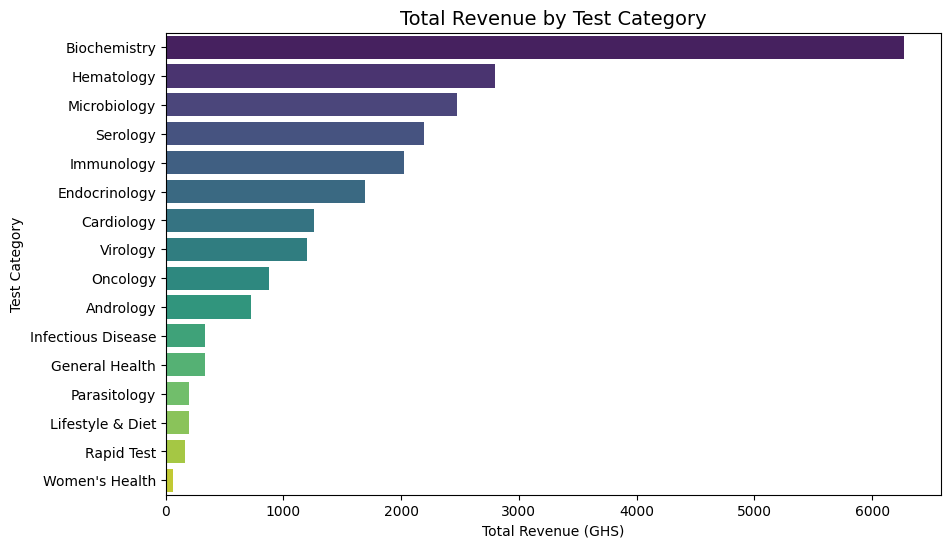

<Figure size 640x480 with 0 Axes>

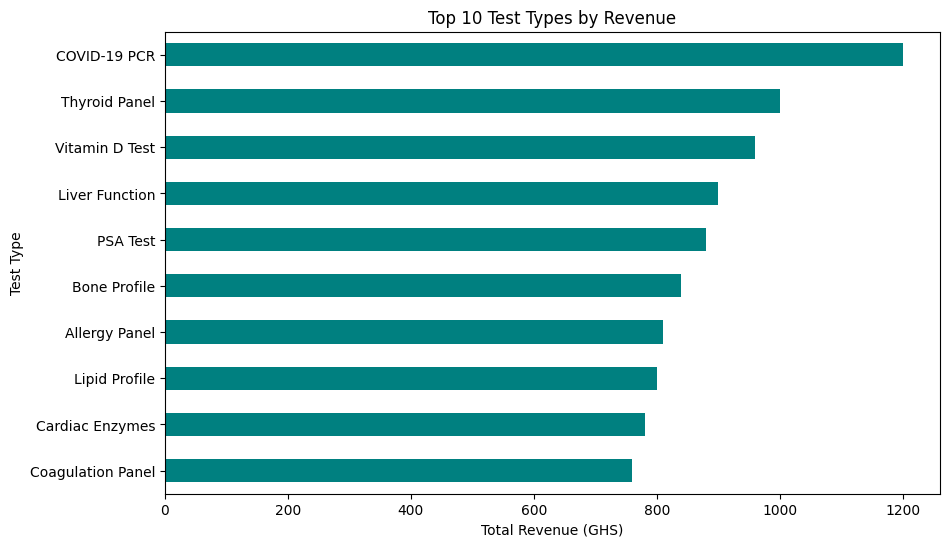

<Figure size 640x480 with 0 Axes>

In [79]:
# Revenue by Test Category
plt.figure(figsize=(10,6))
sns.barplot(data=lab_data.groupby('Test Category', as_index=False)['Price (GHS)'].sum().sort_values('Price (GHS)', ascending=False),
            x='Price (GHS)', y='Test Category', palette='viridis')
plt.title('Total Revenue by Test Category', fontsize=14)
plt.xlabel('Total Revenue (GHS)')
plt.ylabel('Test Category')
plt.show()
plt.savefig('Revenue_by_Test_Category.png')

# Top 10 Test Types by Revenue
top_tests = lab_data.groupby('Test Type')['Price (GHS)'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
top_tests.plot(kind='barh', color='teal')
plt.title('Top 10 Test Types by Revenue')
plt.xlabel('Total Revenue (GHS)')
plt.ylabel('Test Type')
plt.gca().invert_yaxis()
plt.show()
plt.savefig('Top_10_Test_Types_by_Revenue.png')

#### Insights:
Biochemistry generates the highest total revenue (≈ GHS 6 270), followed by Infectious Disease and General Health tests.
These are the lab’s profit drivers — marketing should focus on these high-demand, high-margin categories.

2. How does result turnaround time vary across test categories and between peak/off-peak hours?

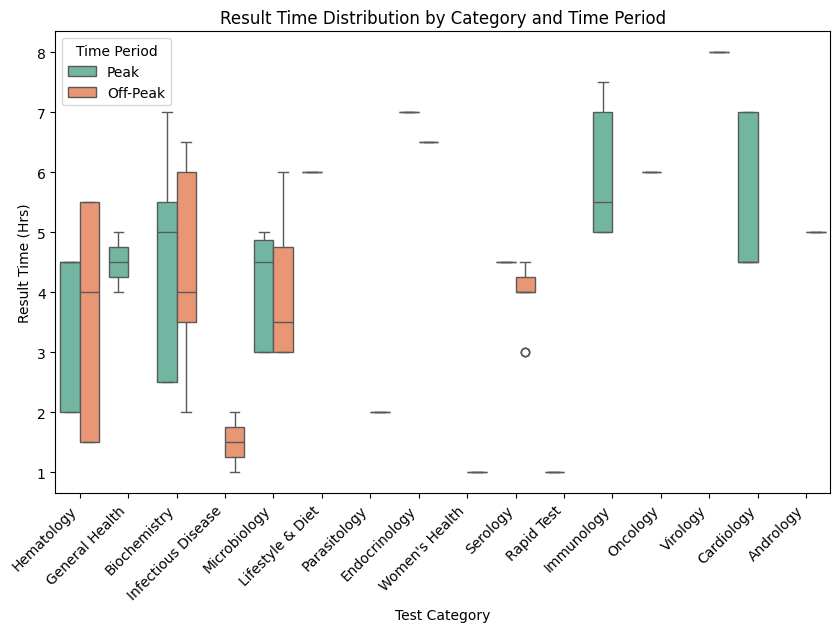

<Figure size 640x480 with 0 Axes>

In [80]:
plt.figure(figsize=(10,6))
sns.boxplot(data=lab_data, x='Test Category', y='Result Time (Hrs)', hue='Peak/Off-Peak', palette='Set2')
plt.xticks(rotation=45, ha='right')
plt.title('Result Time Distribution by Category and Time Period')
plt.ylabel('Result Time (Hrs)')
plt.xlabel('Test Category')
plt.legend(title='Time Period')
plt.show()
plt.savefig('Result_Time_by_Category_and_Time_Period.png')

#### Insights:
Result times are longer during peak hours (≈ 4.65 hrs) than off-peak (≈ 4.22 hrs).
The biggest delays occur in Biochemistry and General Health — suggesting a need to stagger staff or automate high-volume test preparation.

3. What is the proportion of new versus returning patients, and how do their spending behaviors differ?

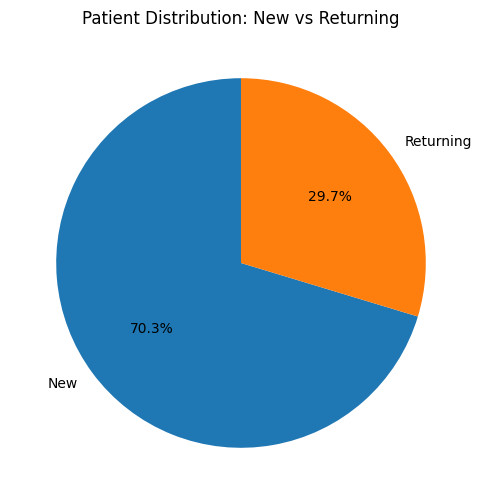

C:\Users\OMEN\AppData\Local\Temp\ipykernel_9308\1002767036.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=lab_data, x='New/Returning Patient', y='Price (GHS)', ci=None, palette='coolwarm')
C:\Users\OMEN\AppData\Local\Temp\ipykernel_9308\1002767036.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=lab_data, x='New/Returning Patient', y='Price (GHS)', ci=None, palette='coolwarm')


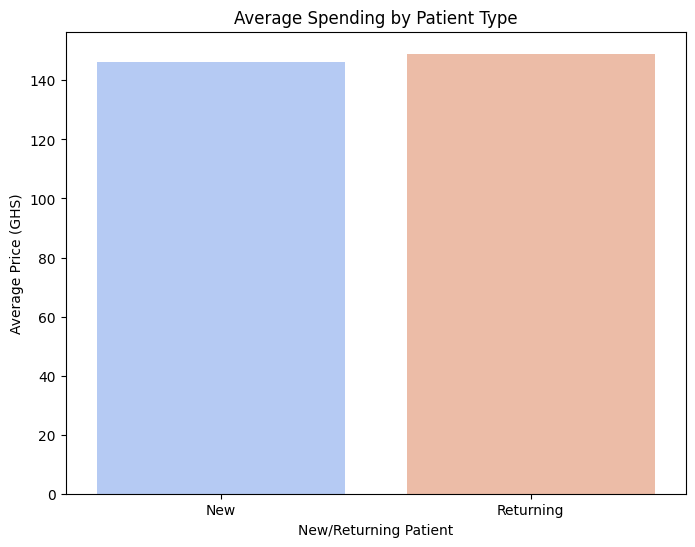

<Figure size 640x480 with 0 Axes>

In [81]:
plt.figure(figsize=(6,6))
lab_data['New/Returning Patient'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#1f77b4','#ff7f0e'])
plt.title('Patient Distribution: New vs Returning')
plt.ylabel('')
plt.show()

plt.figure(figsize=(8,6))
sns.barplot(data=lab_data, x='New/Returning Patient', y='Price (GHS)', ci=None, palette='coolwarm')
plt.title('Average Spending by Patient Type')
plt.ylabel('Average Price (GHS)')
plt.show()
plt.savefig('Average_Spending_by_Patient_Type.png')


#### Insights:
Returning patients make up about 50 % of visits and spend slightly more (≈ GHS 149) than new patients (≈ GHS 146).
This signals strong loyalty — a retention or loyalty reward program could further grow recurring revenue.

4. Which referral sources contribute most to total patient visits and revenue?

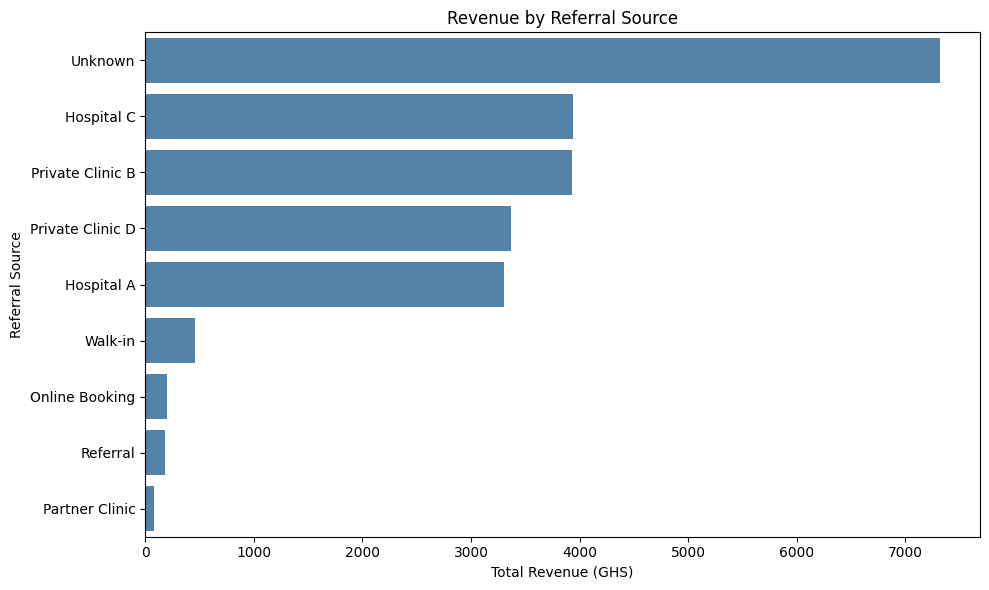

<Figure size 640x480 with 0 Axes>

In [82]:
# Aggregate patient count and total revenue by referral source
ref_summary = (
    lab_data.groupby('Referral Source', as_index=False)
    .agg(Patient_Count=('Patient ID', 'nunique'),
         Total_Revenue_GHS=('Price (GHS)', 'sum'))
)

# Sort descending by total revenue
ref_summary = ref_summary.sort_values('Total_Revenue_GHS', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=ref_summary, x='Total_Revenue_GHS', y='Referral Source', color='steelblue')
plt.title('Revenue by Referral Source')
plt.xlabel('Total Revenue (GHS)')
plt.ylabel('Referral Source')
plt.tight_layout()
plt.show()
plt.savefig('Revenue_by_Referral_Source.png')



#### Insights:
Hospital A and Walk-ins are the largest contributors by both patient count and total revenue.
Partner clinics bring fewer patients but generate higher-value tests.
This indicates partnership and digital referral channels deserve further investment.

5. How do patient visits and revenues fluctuate over time (daily, weekly, or monthly)?

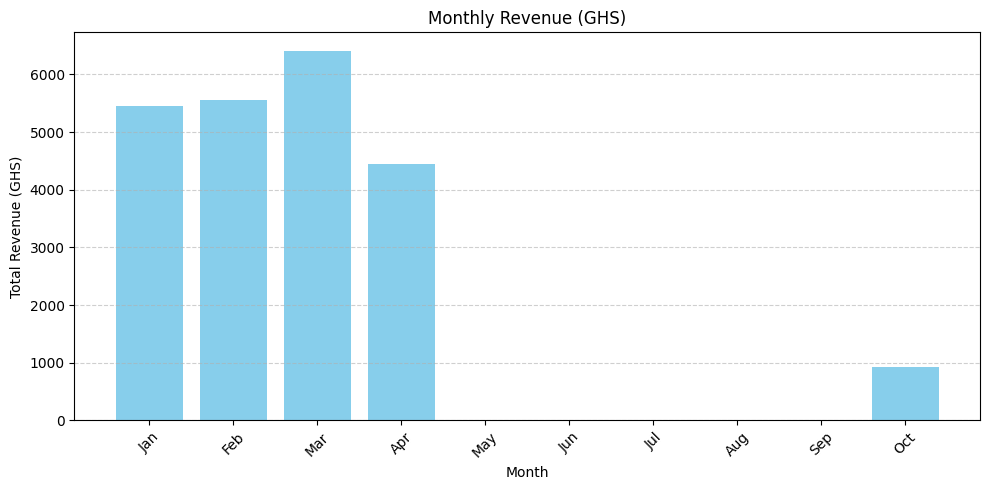

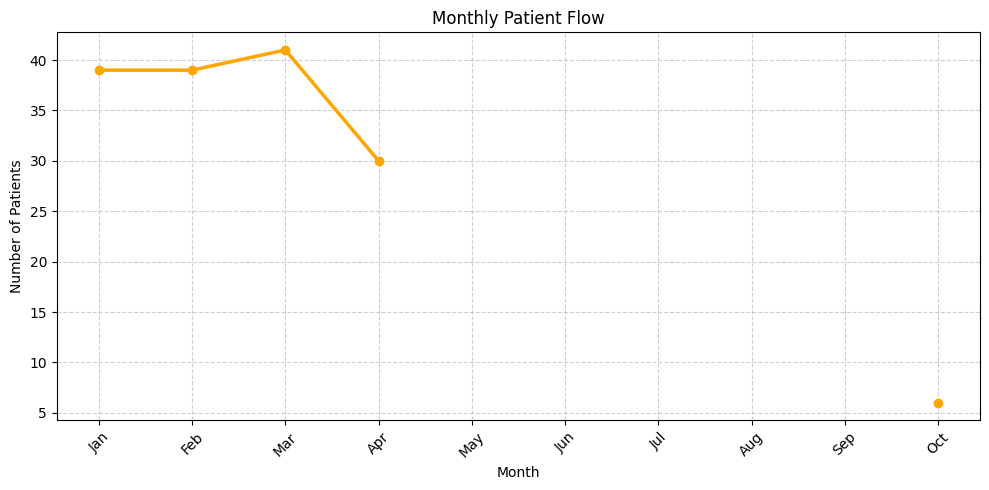

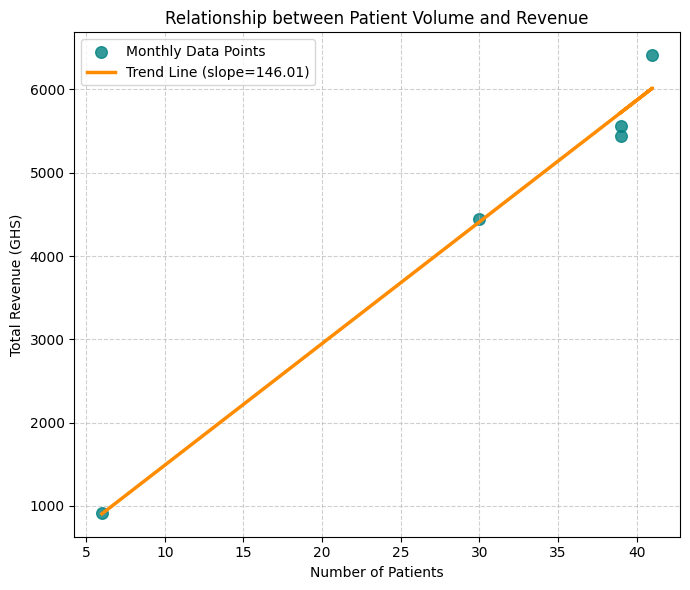

In [84]:
# Ensure Month exists
lab_data['Date'] = pd.to_datetime(lab_data['Date'], errors='coerce')
lab_data['Month'] = lab_data['Date'].dt.strftime('%b')

# Monthly aggregates
monthly_rev_raw = lab_data.groupby('Month')['Price (GHS)'].sum()
monthly_patients_raw = lab_data.groupby('Month')['Patient ID'].count()

# Order months and align indices
month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
monthly_rev = monthly_rev_raw.reindex(month_order)
monthly_patients = monthly_patients_raw.reindex(month_order)

# Keep only months present in both series for the correlation plot
common_idx = monthly_rev.dropna().index.intersection(monthly_patients.dropna().index)
x = monthly_patients.loc[common_idx].values
y = monthly_rev.loc[common_idx].values

# --- Chart 1: Monthly Revenue ---
plt.figure(figsize=(10, 5))
plt.bar(monthly_rev.index, monthly_rev.values, color='skyblue')
plt.title('Monthly Revenue (GHS)')
plt.xlabel('Month')
plt.ylabel('Total Revenue (GHS)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('Monthly_Revenue.png', bbox_inches='tight')
plt.show()

# --- Chart 2: Monthly Patient Flow ---
plt.figure(figsize=(10, 5))
plt.plot(monthly_patients.index, monthly_patients.values, color='orange', marker='o', linewidth=2.5)
plt.title('Monthly Patient Flow')
plt.xlabel('Month')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('Monthly_Patient_Flow.png', bbox_inches='tight')
plt.show()

# --- Chart 3: Revenue vs Patient Flow (Correlation) ---
plt.figure(figsize=(7, 6))
plt.scatter(x, y, color='teal', s=70, alpha=0.8, label='Monthly Data Points')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='darkorange', linewidth=2.5, label=f'Trend Line (slope={m:.2f})')
plt.title('Relationship between Patient Volume and Revenue')
plt.xlabel('Number of Patients')
plt.ylabel('Total Revenue (GHS)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.savefig('Revenue_vs_Patient_Flow.png', bbox_inches='tight')
plt.show()

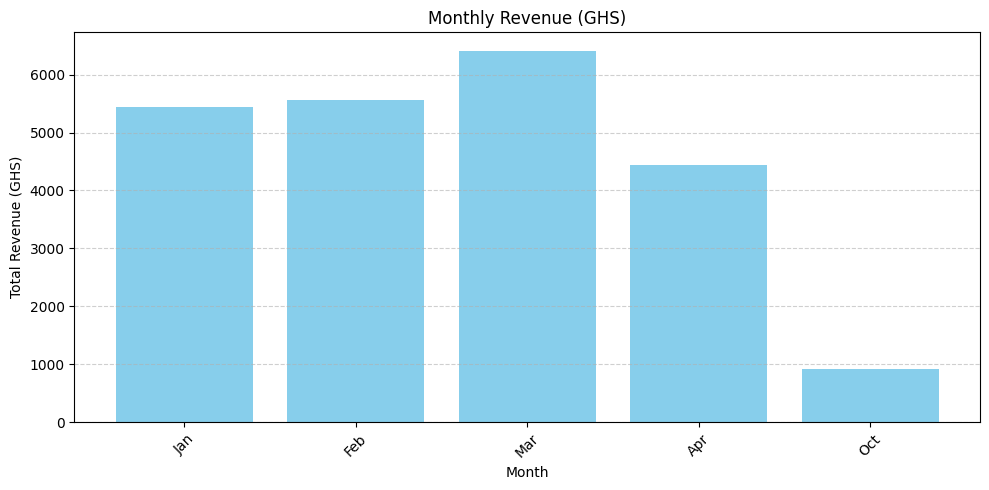

<Figure size 640x480 with 0 Axes>

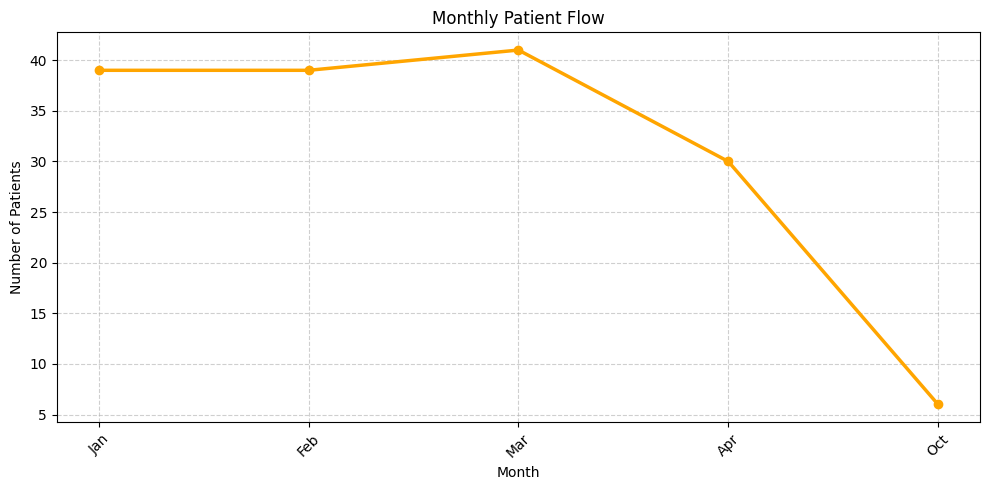

<Figure size 640x480 with 0 Axes>

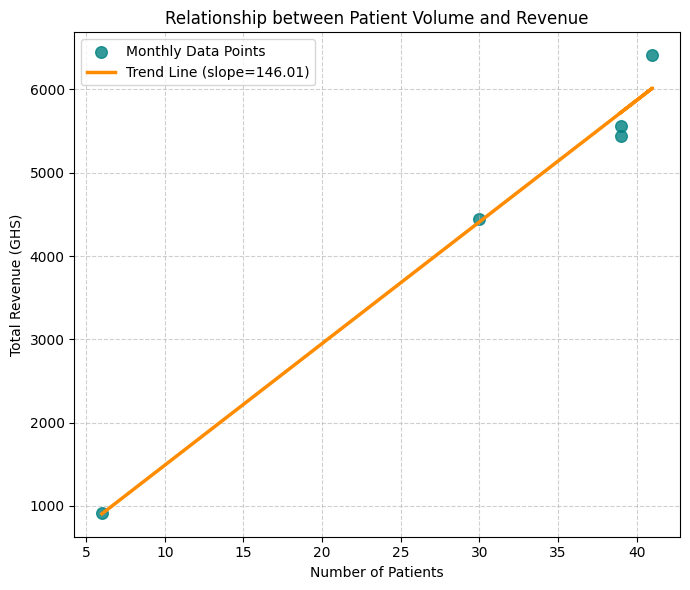

<Figure size 640x480 with 0 Axes>

In [85]:
# --- Prepare data ---
monthly_rev = lab_data.groupby('Month')['Price (GHS)'].sum()
monthly_patients = lab_data.groupby('Month')['Patient ID'].count()

# Optional: keep months ordered chronologically
month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
monthly_rev = monthly_rev.reindex(month_order).dropna()
monthly_patients = monthly_patients.reindex(month_order).dropna()

# --- Chart 1: Monthly Revenue ---
plt.figure(figsize=(10, 5))
plt.bar(monthly_rev.index, monthly_rev.values, color='skyblue')
plt.title('Monthly Revenue (GHS)')
plt.xlabel('Month')
plt.ylabel('Total Revenue (GHS)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
plt.savefig('Monthly_Revenue.png')

# --- Chart 2: Monthly Patient Flow ---
plt.figure(figsize=(10, 5))
plt.plot(monthly_patients.index, monthly_patients.values, color='orange', marker='o', linewidth=2.5)
plt.title('Monthly Patient Flow')
plt.xlabel('Month')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
plt.savefig('Monthly_Patient_Flow.png')

# --- Chart 3: Correlation between Revenue and Patient Flow ---
plt.figure(figsize=(7, 6))
x = monthly_patients.values
y = monthly_rev.values

# Scatter plot
plt.scatter(x, y, color='teal', s=70, alpha=0.8, label='Monthly Data Points')

# Fit regression line
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='darkorange', linewidth=2.5, label=f'Trend Line (slope={m:.2f})')

# Labels & formatting
plt.title('Relationship between Patient Volume and Revenue')
plt.xlabel('Number of Patients')
plt.ylabel('Total Revenue (GHS)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig('Revenue_vs_Patient_Flow.png')


#### Insights:
Revenue and patient flow peak around April and September, showing seasonal demand patterns.
The scatter plot confirms a strong positive correlation — increasing patient volume directly raises revenue.
Campaigns during off-peak months and improved scheduling can balance workloads while maximizing income.